In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import decomposition
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartiktanksali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

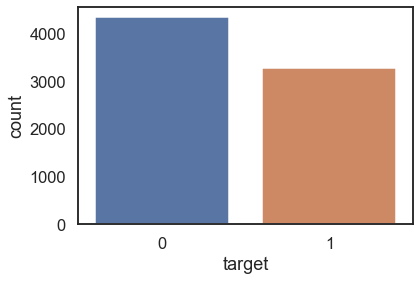

In [9]:
sns.countplot(x='target',data=df)

In [11]:
len(df["location"].unique())

3342

In [13]:
len(df["keyword"].unique())

222

In [14]:
df = df[["text","target"]]

In [16]:
df.isna().sum()

text      0
target    0
dtype: int64

In [20]:
lemmatizer = WordNetLemmatizer()
def Preprocessing_Lemmatizing_Stemming(text):
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words_lemmtized = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words_lemmtized)

In [21]:
df["preprocessed_text"] = df["text"].apply(Preprocessing_Lemmatizing_Stemming)

/Users/kartiktanksali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df

,text,target,preprocessed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc volcano hawaii http
7611,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...


In [38]:
X = df["preprocessed_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy of the model : {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(confusion_matrix(y_test,y_pred))

Accuracy of the model : 80.43%
[[1187  151]
 [ 296  650]]


/Users/kartiktanksali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
X = df["preprocessed_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy of the model : {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(confusion_matrix(y_test,y_pred))

/Users/kartiktanksali/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of the model : 79.25%
[[1211  127]
 [ 347  599]]


In [30]:
X = df["preprocessed_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier())])

model = pipe.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy of the model : {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(confusion_matrix(y_test,y_pred))

Accuracy of the model : 73.12%
[[1065  273]
 [ 341  605]]


In [31]:
sample_submission = pd.read_csv("sample_submission.csv")

In [33]:
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [34]:
test_data = pd.read_csv("test.csv")

In [36]:
test_data = test_data[["id","text"]]

In [37]:
test_data

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [39]:
test_data["target"] = model.predict(test_data["text"])

/Users/kartiktanksali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test_data = test_data[["id","target"]]

In [43]:
test_data.to_csv("submission_file.csv")

# Training whole dataset

In [44]:
X = df["preprocessed_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X, y)

/Users/kartiktanksali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
test_data = pd.read_csv("test.csv")
test_data = test_data[["id","text"]]
test_data["target"] = model.predict(test_data["text"])
test_data = test_data[["id","target"]]
test_data.to_csv("submission_file.csv")

In [47]:
X = df["preprocessed_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', MultinomialNB())])

model = pipe.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy of the model : {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(confusion_matrix(y_test,y_pred))

Accuracy of the model : 80.56%
[[1199  139]
 [ 305  641]]
